In [ ]:
import pandas as pd
import numpy as np
import gc
from collections import Counter
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
hist_data = pd.read_csv('hist_data.csv')
hist_data

,buyer_id,pav_order_id,created,item_id,count,price_sold,flag_weight_goods,weight
0,95203091,98506637863,2021-07-01 00:03:44,202808329,1.000,79.990,False,11.14
1,95203091,98506637863,2021-07-01 00:03:44,202953905,1.072,44.945,True,11.14
2,95203091,98506637863,2021-07-01 00:03:44,203566452,1.000,69.990,False,11.14
3,95203091,98506637863,2021-07-01 00:03:44,202820143,1.972,41.295,True,11.14
4,95203091,98506637863,2021-07-01 00:03:44,204400422,1.000,269.990,False,11.14
...,...,...,...,...,...,...,...,...
4529884,95619205,4620221347,2021-09-07 18:48:29,204351817,1.000,99.990,False,9.84
4529885,95619205,4620221347,2021-09-07 18:48:29,203523604,1.000,62.190,False,9.84
4529886,95619205,4620221347,2021-09-07 18:48:29,203566357,2.000,39.890,False,9.84
4529887,95619205,4620221347,2021-09-07 18:48:29,203566418,1.000,62.190,False,9.84


In [ ]:
test_df = pd.read_csv('test.csv')
test_df

,buyer_id,pav_order_id,created,item_id,count,price_sold,flag_weight_goods
0,94640077,98519243164,2021-08-30 17:56:31,203053459,1.00,67.62,False
1,95865222,98512083628,2021-07-26 16:17:21,202967705,1.14,406.80,True
2,95147155,98519972197,2021-09-02 21:54:18,203551512,1.00,52.77,False
3,94832207,98518646272,2021-08-28 10:43:23,202801712,1.00,92.89,False
4,95483101,98510857920,2021-07-20 14:27:08,203416702,2.00,238.99,False
...,...,...,...,...,...,...,...
1081415,95178159,98519703380,2021-09-01 19:10:29,203240557,1.00,69.99,False
1081416,95597512,98519797071,2021-09-02 10:29:11,202806932,1.00,44.99,False
1081417,95553515,98520350679,2021-09-04 11:33:18,205755780,3.00,44.89,False
1081418,95688424,98509396234,2021-07-13 14:41:37,203423005,1.00,46.74,False


In [ ]:
test_df.nunique()

buyer_id             80244
pav_order_id         80244
created              78305
item_id              39032
count                 5547
price_sold           40596
flag_weight_goods        2
dtype: int64

In [ ]:
hist_data['item_id'].value_counts()

202820148    65840
202872237    41658
202809628    27245
202838754    17863
202862432    17640
             ...  
204101206        1
204350511        1
204090531        1
204183401        1
204079718        1
Name: item_id, Length: 52472, dtype: int64

In [ ]:
hist_data.isnull().sum()

buyer_id             0
pav_order_id         0
created              0
item_id              0
count                0
price_sold           7
flag_weight_goods    0
weight               0
dtype: int64

In [ ]:
test_df.isnull().sum()

buyer_id             0
pav_order_id         0
created              0
item_id              0
count                0
price_sold           0
flag_weight_goods    0
dtype: int64

In [ ]:
hist_data['price_sold'] = hist_data.apply(lambda row: 0 if row['Desc'] == 'Studio' else 1,
            axis=1)

missing_values = [] #row_number
for k in missing_values:  
  hist_data.iloc[] = fillna(mode[0] #condition ['buyer_id'] == missing_values)
  cond = X['year'] < 2010
  hist_data['price_sold'] = X['mode'].fillna(cond.map({True:'manual', False: 'automatic'}))           

In [ ]:
def get_price(row):
   price = row['price_sold'] / row['count']
   return price

In [ ]:
hist_data['price'] = hist_data.apply(get_price, axis = 1)

In [ ]:
hist_data.head(20)

,buyer_id,pav_order_id,created,item_id,count,price_sold,flag_weight_goods,weight
0,95203091,98506637863,2021-07-01 00:03:44,202808329,1.000,79.990,False,11.14
1,95203091,98506637863,2021-07-01 00:03:44,202953905,1.072,44.945,True,11.14
2,95203091,98506637863,2021-07-01 00:03:44,203566452,1.000,69.990,False,11.14
3,95203091,98506637863,2021-07-01 00:03:44,202820143,1.972,41.295,True,11.14
4,95203091,98506637863,2021-07-01 00:03:44,204400422,1.000,269.990,False,11.14
5,95203091,98506637863,2021-07-01 00:03:44,202936013,1.000,109.890,False,11.14
6,95203091,98506637863,2021-07-01 00:03:44,202838754,1.002,43.945,True,11.14
7,95203091,98506637863,2021-07-01 00:03:44,203068900,0.968,52.395,True,11.14
8,95203091,98506637863,2021-07-01 00:03:44,202880254,0.958,95.945,True,11.14
9,95203091,98506637863,2021-07-01 00:03:44,202791060,1.000,69.990,False,11.14


In [ ]:
hist_data.nunique()

buyer_id              63925
pav_order_id         231339
created              223826
item_id               52472
count                  7435
price_sold            66724
flag_weight_goods         2
weight                 6298
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 2000.0)

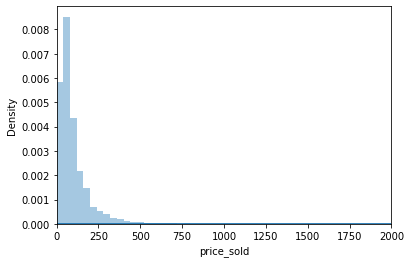

In [ ]:
ax = sns.distplot(hist_data['price_sold'], kde=True, hist=True, hist_kws={"range": [0,2000]})
ax.set_xlim(0, 2000)

In [ ]:
hist_data['price_sold'].mean()

104.64371751676688

In [ ]:
hist_data[hist_data['flag_weight_goods'] == True]['item_id'].value_counts()

202820148    65840
202872237    41658
202809628    27245
202838754    17863
202862432    17640
             ...  
202963532        1
205718669        1
204072223        1
204059916        1
202987745        1
Name: item_id, Length: 3586, dtype: int64

In [ ]:
hist_data[(hist_data['flag_weight_goods'] == True) & (hist_data['item_id'] == 202820148)]

,buyer_id,pav_order_id,created,item_id,count,price_sold,flag_weight_goods,weight
131,94748662,98506638761,2021-07-01 00:17:38,202820148,2.756,49.99,True,20.46
224,94606478,98506639567,2021-07-01 00:33:41,202820148,1.964,52.99,True,7.88
298,95347129,98506639803,2021-07-01 00:41:35,202820148,0.868,51.99,True,19.47
334,94785515,98506640231,2021-07-01 00:49:12,202820148,0.986,48.23,True,8.10
513,95941132,98506641082,2021-07-01 01:21:10,202820148,1.048,103.98,True,24.20
...,...,...,...,...,...,...,...,...
4529300,94733665,98521109195,2021-09-07 09:37:03,202820148,1.018,57.39,True,12.90
4529373,94611051,98521128459,2021-09-07 10:49:47,202820148,0.998,53.89,True,11.60
4529404,96379793,5700018109,2021-09-07 11:49:27,202820148,0.912,64.99,True,11.81
4529464,95849117,98521160325,2021-09-07 12:48:47,202820148,1.000,58.99,True,4.19


In [ ]:
hist_data[hist_data['buyer_id'] == 94578442]

,buyer_id,pav_order_id,created,item_id,count,price_sold,flag_weight_goods,weight
137478,94578442,98507010775,2021-07-02 17:20:51,205810829,1.000,99.990,False,9.74
137479,94578442,98507010775,2021-07-02 17:20:51,203059303,1.000,37.995,True,9.74
137480,94578442,98507010775,2021-07-02 17:20:51,202979560,1.000,89.990,True,9.74
137481,94578442,98507010775,2021-07-02 17:20:51,203438161,0.500,69.995,True,9.74
137482,94578442,98507010775,2021-07-02 17:20:51,203393205,2.000,99.890,False,9.74
137483,94578442,98507010775,2021-07-02 17:20:51,203529348,2.000,94.990,False,9.74
137484,94578442,98507010775,2021-07-02 17:20:51,203457496,6.000,39.990,False,9.74
137485,94578442,98507010775,2021-07-02 17:20:51,202807303,1.000,298.890,False,9.74
137486,94578442,98507010775,2021-07-02 17:20:51,202820148,1.000,71.790,True,9.74
137487,94578442,98507010775,2021-07-02 17:20:51,202819114,1.000,31.990,True,9.74


In [ ]:
#Хочу узнать частоту встречаемости одного товара во всех заказах для одного пользователя

hist_data[['item_id', 'buyer_id', 'count']].groupby('item_id').count().sort_values(by = ['buyer_id'],ascending=False) 
#cколько товара покупало пользователей

buyer_list = hist_data[['item_id', 'buyer_id', 'count']].groupby(['buyer_id','item_id']).count()
print(buyer_list)
#сколько раз покупал юзер

#количество заказов у юзера
hist_data[['buyer_id', 'pav_order_id']].drop_duplicates().groupby('buyer_id').count()

#количество заказов у юзера с именно этим товаром и сколько их
hist_data[['buyer_id', 'pav_order_id', 'item_id']].groupby(['buyer_id', 'item_id']).count()

                    count
buyer_id item_id         
94578442 202795926      1
         202801709      2
         202806979      2
         202806998      1
         202807303      1
...                   ...
96400990 203445463      1
         203457302      1
         203581478      1
         205797303      1
         211101237      1

[3644166 rows x 1 columns]


pav_order_id
buyer_id item_id                
94578442 202795926             1
         202801709             2
         202806979             2
         202806998             1
         202807303             1
...                          ...
96400990 203445463             1
         203457302             1
         203581478             1
         205797303             1
         211101237             1

[3644166 rows x 1 columns]

In [ ]:
sum_orders = hist_data[['buyer_id', 'pav_order_id', 'price_sold']].groupby(['buyer_id', 'pav_order_id']).sum().reset_index()
sum_orders.sort_values(by = 'price_sold', ascending = False).head(50)
a = groupby('buyer_id')['price_sold'].mean()

,buyer_id,pav_order_id,price_sold
74647,94950058,98508150998,752382.917
62710,94887683,98509435613,676801.461
103768,95104279,98509441602,676122.123
206126,95983934,98508989003,602031.970
125477,95225942,98509227439,600378.420
184572,95740358,4620155462,38585.490
184573,95740358,4620170483,24282.050
81475,94988537,98515207344,19242.176
48275,94801698,98513293809,18543.668
69938,94927466,98508829265,17334.696


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


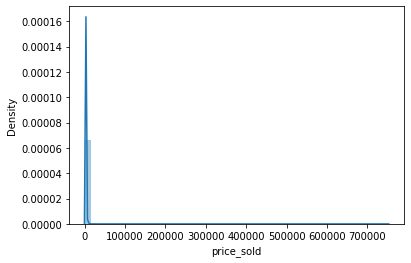

In [ ]:
sns.distplot(sum_orders['price_sold'])

# Baseline

In [ ]:
# соберем словарь встречаемостей - какие item_id покупались чаще с 
# каждым item_id 
tmp = (
    test_df[['item_id', 'pav_order_id']]
    .sort_values(['item_id', 'pav_order_id'])
    .merge(_data[['item_id', 'pav_order_id']], how='left', on=['pav_order_id'], suffixes=('', '_left'))
)
tmp = tmp[tmp['item_id'] != tmp['item_id_left']].copy()
print(tmp)
tmp1 = tmp.groupby(['item_id'])['item_id_left'].agg(lambda x: Counter(x).most_common(10))
print(tmp1)

most_freq_dict = {k: v for (k, v) in tmp1.iteritems()}
most_freq_dict

del tmp1, tmp
gc.collect()

# Пример использования подхода из бейзлайна для тестирования модели и 
# расчета метрики через деление hist_data на трейн и валидацию
def split_data(data, test_size=0.3):
    orders_sort = data[['pav_order_id', 'created']].drop_duplicates().sort_values(by=['created', 'pav_order_id'])
    train_orders, test_orders = train_test_split(orders_sort['pav_order_id'].tolist(), test_size=test_size, shuffle=False)
    train_orders, test_orders = set(train_orders), set(test_orders)
    train = data[data['pav_order_id'].apply(lambda x: x in train_orders)]
    test = data[data['pav_order_id'].apply(lambda x: x in test_orders)]
    return train, test, orders_sort, train_orders, test_orders

# из списка кандидатов по совстречаемости удаляем повторяющиеся item_id, сохраняя порядок
def get_unique_recs(recs: list, top_n: int) -> list:
    rec_dict = {}
    counter = 0
    for k, v in recs:
        if k not in rec_dict:
            rec_dict[k] = v
            counter += 1
        if counter == top_n:
            break
    return list(rec_dict.keys())

def rec_by_item(item_id: int, most_freq_dict: dict) -> list:
    
    return most_freq_dict.get(item_id, None)

# для каждого item_id соберем top_n самых часто встречающихся item_id, отсортируем по частоте и выберем уникальные
def rec_by_basket(basket: list, most_freq_dict: dict, top_n: int = 20) -> list:
    
    res = []
    for item in basket:
        recs = rec_by_item(item, most_freq_dict)
        if recs is not None:
            res += recs
    
    res = sorted(res, key=lambda x: x[1], reverse=True)
    
    return get_unique_recs(res, top_n)

# метрики оцениваются для вектора релевантности. пример:
# реальные item_id, которые приобрел покупатель: [1 ,4, 5, 69]
# рекомендованные алгоритмом item_id: [4, 6, 7, 8, 1, 2, 67, 90]
# тогда вектор релеватности будет выглядеть следующим образом: [1, 0, 0, 0, 1, 0, 0, 0]
# и уже по нему будет расчитываться ndcg
def dcg(
    y_relevance: np.ndarray
) -> float:
    return np.sum([(2**i - 1) / np.log2(k + 1) for (k, i) in enumerate(y_relevance, start=1)])

def ndcg(
    y_relevance: np.ndarray,
    k: int
) -> float:
    if y_relevance.sum() == 0:
        return 0.0
    DCG = dcg(y_relevance[:k])
    IDCG = dcg(-np.sort(-y_relevance)[:k])
    return DCG / IDCG

def apply_relevance(x):
    return [int(item in x['basket']) for item in x['preds']]

def create_relevance(pred):
    d = pred.copy()
    d['basket'] = d['basket'].apply(set)
    d = d.apply(apply_relevance, axis=1)
    return d

def ndcg_full_dataset(d):
    dd = pd.DataFrame(d.to_list()).fillna(0).to_numpy()
    k = dd.shape[1]
    scores = [ndcg(dd[i], k) for i in range(len(dd))]
    return np.mean(scores)

def compute_ndcg_score(pred):
    relevance = create_relevance(pred)
    return ndcg_full_dataset(relevance)

def make_coocurs_dict(train_data):
    tmp = (
        train_data[['item_id', 'pav_order_id']]
        .sort_values(['item_id', 'pav_order_id'])
        .merge(train_data[['item_id', 'pav_order_id']], how='left', on=['pav_order_id'], suffixes=('', '_left'))
    )
    tmp = tmp[tmp['item_id'] != tmp['item_id_left']].copy()
    tmp1 = tmp.groupby(['item_id'])['item_id_left'].agg(lambda x: Counter(x).most_common(10))

    most_freq_dict = {k: v for (k, v) in tmp1.iteritems()}

    del tmp1, tmp
    gc.collect()
    return most_freq_dict

def create_basket(test_data):
    pred = test_data.groupby(['pav_order_id'])['item_id'].agg([('basket', list)])
    return pred

             item_id  pav_order_id  item_id_left
0          202782406    4620130654     203426415
1          202782406    4620130654     203042853
2          202782406    4620130654     209128223
3          202782406    4620130654     204012148
4          202782406    4620130654     202795806
...              ...           ...           ...
106074423  218240709   98518623098     217983495
106074424  218240709   98518623098     203443527
106074425  218240709   98518623098     202804467
106074426  218240709   98518623098     202883977
106074427  218240709   98518623098     203445217

[101544546 rows x 3 columns]
item_id
202782406    [(202820148, 17), (202872237, 13), (202818687,...
202782407    [(204020815, 1), (204011988, 1), (202793061, 1...
202782412    [(203451499, 2), (204039463, 2), (202820148, 2...
202782414    [(203579617, 3), (202872237, 2), (203118216, 2...
202782415    [(202820148, 4), (204002978, 4), (204126838, 4...
                                   ...                     

In [ ]:
def make_coocurs_dict(train_data):
    tmp = (
        train_data[['item_id', 'pav_order_id']]
        .sort_values(['item_id', 'pav_order_id'])
        .merge(train_data[['item_id', 'pav_order_id']], how='left', on=['pav_order_id'], suffixes=('', '_left'))
    )
    tmp = tmp[tmp['item_id'] != tmp['item_id_left']].copy()
    tmp1 = tmp.groupby(['item_id'])['item_id_left'].agg(lambda x: Counter(x).most_common(10))
    del tmp1, tmp
    gc.collect()
    return most_freq_dict

In [ ]:
data = pd.read_csv('test.csv')
data.sort_values(by = 'buyer_id')

,buyer_id,pav_order_id,created,item_id,count,price_sold,flag_weight_goods
699289,94578440,98520921566,2021-09-06 12:10:34,202800367,2.000,85.490,False
793423,94578440,98520921566,2021-09-06 12:10:34,203317811,1.000,62.900,False
83775,94578440,98520921566,2021-09-06 12:10:34,202808824,1.000,53.990,False
514897,94578440,98520921566,2021-09-06 12:10:34,203410558,1.000,192.590,False
703978,94578440,98520921566,2021-09-06 12:10:34,202880254,0.528,35.995,True
...,...,...,...,...,...,...,...
140539,96406335,98521277047,2021-09-07 20:50:25,204011748,1.000,98.890,False
112299,96406335,98521277047,2021-09-07 20:50:25,202808615,2.000,19.890,False
397721,96406335,98521277047,2021-09-07 20:50:25,204043462,1.000,374.490,False
241370,96406335,98521277047,2021-09-07 20:50:25,203476051,2.000,29.890,False


In [ ]:
data.nunique()

buyer_id             80244
pav_order_id         80244
created              78305
item_id              39032
count                 5547
price_sold           40596
flag_weight_goods        2
dtype: int64

In [ ]:
# предсказываем
def split_data(data, test_size=0.2):
    orders_sort = data[['pav_order_id', 'created']].drop_duplicates().sort_values(by=['created', 'pav_order_id'])
    train_orders, test_orders = train_test_split(orders_sort['pav_order_id'].tolist(), test_size=test_size, shuffle=False)
    train_orders, test_orders = set(train_orders), set(test_orders)
    train = data[data['pav_order_id'].apply(lambda x: x in train_orders)]
    test = data[data['pav_order_id'].apply(lambda x: x in test_orders)]
    return train, test, orders_sort, train_orders, test_orders

train_data, test_data, orders_sort, train_orders, test_orders = split_data(hist_data)
most_freq_dict = make_coocurs_dict(train_data)

pred = make_predictions(test_df, most_freq_dict)
pred = pred.drop('basket', axis = 1).sort_values(by = 'pav_order_id', ascending = True)
pred

,preds
pav_order_id,
4620121489,"[202820148, 202872237, 202791620, 202809628, 2..."
4620121505,"[202820148, 202872237, 202880262, 203068900, 2..."
4620121594,"[202820148, 202872237, 203059303, 203068900, 2..."
4620121684,"[202820148, 203090014, 202872237, 202791620, 2..."
4620121902,"[202820148, 203422957, 203431923, 202872237, 2..."
...,...
98521278256,"[202820148, 202791192, 202872237, 202809628, 2..."
98521278378,"[202820148, 202872237, 202809628, 203404725, 2..."
98521278699,"[202820148, 202872237, 202809628, 203566372, 2..."


In [ ]:
pred.to_csv("preds_on_test_data.csv")

In [ ]:
pred = pred.drop('basket', axis = 1).sort_values(by = 'pav_order_id', ascending = True)
pred.to_csv("preds_on_test_data.csv")

In [ ]:
print(pred)

                                                          preds
pav_order_id                                                   
4620121489    [202820148, 202872237, 202809628, 202818687, 2...
4620121505    [202820148, 202872237, 202809628, 202880262, 2...
4620121594    [202820148, 202809628, 202872237, 203059303, 2...
4620121684    [202820148, 202807341, 202872237, 202808200, 2...
4620121902    [202820148, 203431923, 203422957, 203422959, 2...
...                                                         ...
98521278256   [202820148, 202809628, 202793061, 212519969, 2...
98521278378   [202820148, 202872237, 202809628, 203404725, 2...
98521278699   [203529288, 202820148, 203529352, 212519969, 2...
98521278890   [202872237, 202809628, 203404725, 202854572, 2...
98521278926   [202820148, 202872237, 203407254, 202807193, 2...

[80244 rows x 1 columns]


In [ ]:
tmp = (
    hist_data[['item_id', 'pav_order_id']]
    .sort_values(['item_id', 'pav_order_id'])
    .merge(hist_data[['item_id', 'pav_order_id']], how='left', on=['pav_order_id'], suffixes=('', '_left'))
)
tmp = tmp[tmp['item_id'] != tmp['item_id_left']].copy()
print(tmp)

             item_id  pav_order_id  item_id_left
0          202782406    4620130654     203426415
1          202782406    4620130654     203042853
2          202782406    4620130654     209128223
3          202782406    4620130654     204012148
4          202782406    4620130654     202795806
...              ...           ...           ...
106074886  218240709   98518623098     217983495
106074887  218240709   98518623098     203443527
106074888  218240709   98518623098     202804467
106074889  218240709   98518623098     202883977
106074890  218240709   98518623098     203445217

[101545002 rows x 3 columns]


In [ ]:
tmp[(tmp['item_id'] == 202782406) & (tmp['item_id_left'] == 202820148)]

,item_id,pav_order_id,item_id_left
155,202782406,98506705682,202820148
236,202782406,98507339539,202820148
315,202782406,98507723739,202820148
335,202782406,98507980943,202820148
449,202782406,98508911920,202820148
727,202782406,98510290154,202820148
853,202782406,98511455940,202820148
1008,202782406,98512755255,202820148
1098,202782406,98513140341,202820148
1235,202782406,98513355824,202820148


In [ ]:
tmp1 = tmp.groupby(['item_id'])['item_id_left'].agg(lambda x: Counter(x).most_common(10))
print(tmp1)

item_id
202782406    [(202820148, 17), (202872237, 13), (202818687,...
202782407    [(204020815, 1), (204011988, 1), (202793061, 1...
202782412    [(203451499, 2), (204039463, 2), (202820148, 2...
202782414    [(203579617, 3), (202872237, 2), (203118216, 2...
202782415    [(202820148, 4), (204002978, 4), (204126838, 4...
                                   ...                        
218175579    [(202991732, 1), (202806882, 1), (202820398, 1...
218199321    [(204069817, 1), (202796173, 1), (210896763, 1...
218217955    [(217881419, 1), (210896763, 1), (204350492, 1...
218217991    [(203566372, 1), (202819015, 1), (202844455, 1...
218240709    [(202904092, 1), (203084145, 1), (202818748, 1...
Name: item_id_left, Length: 52472, dtype: object


In [ ]:
most_freq_dict = {k: v for (k, v) in tmp1.iteritems()}
most_freq_dict

{202782406: [(202820148, 17),
  (202872237, 13),
  (202818687, 11),
  (202809628, 10),
  (202791620, 9),
  (203059303, 9),
  (203404725, 7),
  (202807362, 7),
  (202838754, 7),
  (202862432, 6)],
 202782407: [(204020815, 1),
  (204011988, 1),
  (202793061, 1),
  (204077680, 1),
  (204113972, 1),
  (202801546, 1),
  (202801522, 1),
  (205761993, 1),
  (203480880, 1)],
 202782412: [(203451499, 2),
  (204039463, 2),
  (202820148, 2),
  (211072569, 1),
  (203521361, 1),
  (204039462, 1),
  (202807260, 1),
  (211072571, 1),
  (204081917, 1),
  (211072567, 1)],
 202782414: [(203579617, 3),
  (202872237, 2),
  (203118216, 2),
  (202803976, 2),
  (204141065, 2),
  (203475840, 2),
  (204141073, 2),
  (203089855, 1),
  (202926374, 1),
  (203042810, 1)],
 202782415: [(202820148, 4),
  (204002978, 4),
  (204126838, 4),
  (202862432, 3),
  (202791611, 3),
  (211041437, 2),
  (202860897, 2),
  (202794687, 2),
  (202880254, 2),
  (202807260, 2)],
 202782417: [(202883917, 1),
  (203458919, 1),
  (2034

In [ ]:
def get_unique_recs(recs: list, top_n: int) -> list:
    rec_dict = {}
    counter = 0
    for k, v in recs:
        if k not in rec_dict:
            rec_dict[k] = v
            counter += 1
        if counter == top_n:
            break
    return list(rec_dict.keys())

def rec_by_item(item_id: int, most_freq_dict: dict) -> list:
    
    return most_freq_dict.get(item_id, None)

In [ ]:
get_unique_recs(most_freq_dict[202795731], 10)

[203114237,
 202803976,
 202799951,
 202820273,
 202838754,
 202800434,
 202896303,
 203007052,
 204086552,
 210734383]

In [ ]:
def rec_by_item(item_id: int, most_freq_dict: dict) -> list:
    return most_freq_dict.get(item_id, None)

# для каждого item_id соберем top_n самых часто встречающихся item_id, 
# отсортируем по частоте и выберем уникальные
def rec_by_basket(basket: list, most_freq_dict: dict, top_n: int = 20) -> list:
    
    res = []
    for item in basket:
        recs = rec_by_item(item, most_freq_dict)
        if recs is not None:
            res += recs
    
    res = sorted(res, key=lambda x: x[1], reverse=True)
    
    return get_unique_recs(res, top_n)

pred = test.groupby(['pav_order_id'])['item_id'].agg([('basket', list)])
pred['preds'] = pred['basket'].map(lambda x: rec_by_basket(x, most_freq_dict=most_freq_dict))

pred['preds'].to_csv('pred.csv')

In [ ]:
rec_by_item(202795731, most_freq_dict)

[(203114237, 3),
 (202803976, 3),
 (202799951, 2),
 (202820273, 2),
 (202838754, 2),
 (202800434, 2),
 (202896303, 2),
 (203007052, 2),
 (204086552, 2),
 (210734383, 2)]

In [ ]:
rec_by_item(202872237, most_freq_dict)

[(202820148, 14353),
 (202809628, 10576),
 (203404725, 6880),
 (202862432, 5768),
 (202838754, 5478),
 (202854572, 5217),
 (202864758, 4970),
 (203059303, 4763),
 (202843988, 4602),
 (203068900, 4361)]

In [ ]:
rec_by_item(202820148, most_freq_dict)

[(202872237, 14353),
 (202809628, 9155),
 (202838754, 6950),
 (203059303, 6731),
 (202862432, 6525),
 (203404725, 6245),
 (202880262, 5663),
 (203068900, 5640),
 (202854572, 5616),
 (202820143, 5472)]

In [ ]:
rec_by_basket(most_freq_dict, most_freq_dict) #самые популярные 20 товаров или самые популярные связки товаров

[202872237,
 202820148,
 202809628,
 203404725,
 202838754,
 203059303,
 202862432,
 202880262,
 203068900,
 202854572,
 202820143,
 202864758,
 202843988,
 202820288,
 202820144,
 212519969,
 202791192,
 202807362,
 202880254,
 203367251]

In [ ]:
sorted = hist_data[['pav_order_id', 'created']].drop_duplicates().sort_values(by=['created', 'pav_order_id'])

In [ ]:
train_orders, test_orders = train_test_split(sorted['pav_order_id'].tolist(), test_size=0.3, shuffle=False)
train_orders[:10], test_orders[:10]

([98506637863,
  98506638027,
  98506638756,
  98506638757,
  98506638761,
  98506638994,
  98506639087,
  98506639129,
  98506639155,
  98506639496,
  98506639567,
  98506639655,
  98506639845,
  98506639803,
  98506640231,
  98506640331,
  98506640368,
  98506640434,
  98506640362,
  98506640555,
  98506640548,
  98506640872,
  98506640780,
  98506640929,
  98506641082,
  98506641072,
  98506641567,
  98506641616,
  4620121471,
  98506642088,
  98506642130,
  98506642333,
  98506642416,
  98506642432,
  98506642564,
  4620121478,
  98506642652,
  98506642615,
  98506642809,
  98506642939,
  98506643087,
  98506643291,
  4620121484,
  98506643651,
  98506643713,
  4620121490,
  98506644069,
  98506644121,
  98506644108,
  98506644277,
  98506644353,
  98506644431,
  98506644587,
  98506644656,
  98506644657,
  98506644712,
  98506644772,
  98506644763,
  98506644810,
  98506644813,
  98506644816,
  98506644896,
  98506644917,
  98506644957,
  98506645096,
  98506645453,
  98506645516,

In [ ]:
train = hist_data[hist_data['pav_order_id'].apply(lambda x: x in train_orders)]
train #test, orders_sort, train_orders, test_orders

In [ ]:
def get_unique_recs(recs: list, top_n: int) -> list:
    rec_dict = {}
    counter = 0
    for k, v in recs:
        if k not in rec_dict:
            rec_dict[k] = v
            counter += 1
        if counter == top_n:
            break
    return list(rec_dict.keys())

def rec_by_item(item_id: int, most_freq_dict: dict) -> list:
    
    return most_freq_dict.get(item_id, None)

# для каждого item_id соберем top_n самых часто встречающихся item_id, отсортируем по частоте и выберем уникальные
def rec_by_basket(basket: list, most_freq_dict: dict, top_n: int = 20) -> list:
    
    res = []
    for item in basket:
        recs = rec_by_item(item, most_freq_dict)
        if recs is not None:
            res += recs
    
    res = sorted(res, key=lambda x: x[1], reverse=True)
    
    return get_unique_recs(res, top_n)

# метрики оцениваются для вектора релевантности. пример:
# реальные item_id, которые приобрел покупатель: [1 ,4, 5, 69]
# рекомендованные алгоритмом item_id: [4, 6, 7, 8, 1, 2, 67, 90]
# тогда вектор релеватности будет выглядеть следующим образом: [1, 0, 0, 0, 1, 0, 0, 0]
# и уже по не му будет расчитываться ndcg
def dcg(
    y_relevance: np.ndarray
) -> float:
    return np.sum([(2**i - 1) / np.log2(k + 1) for (k, i) in enumerate(y_relevance, start=1)])

def ndcg(
    y_relevance: np.ndarray,
    k: int
) -> float:
    if y_relevance.sum() == 0:
        return 0.0
    DCG = dcg(y_relevance[:k])
    IDCG = dcg(-np.sort(-y_relevance)[:k])
    return DCG / IDCG

def apply_relevance(x):
    return [int(item in x['basket']) for item in x['preds']]

def create_relevance(pred):
    d = pred.copy()
    d['basket'] = d['basket'].apply(set)
    d = d.apply(apply_relevance, axis=1)
    return d

def ndcg_full_dataset(d):
    dd = pd.DataFrame(d.to_list()).fillna(0).to_numpy()
    k = dd.shape[1]
    scores = [ndcg(dd[i], k) for i in range(len(dd))]
    return np.mean(scores)

def compute_ndcg_score(pred):
    relevance = create_relevance(pred)
    return ndcg_full_dataset(relevance)

def make_coocurs_dict(train_data):
    tmp = (
        train_data[['item_id', 'pav_order_id']]
        .sort_values(['item_id', 'pav_order_id'])
        .merge(train_data[['item_id', 'pav_order_id']], how='left', on=['pav_order_id'], suffixes=('', '_left'))
    )
    tmp = tmp[tmp['item_id'] != tmp['item_id_left']].copy()
    tmp1 = tmp.groupby(['item_id'])['item_id_left'].agg(lambda x: Counter(x).most_common(10))

    most_freq_dict = {k: v for (k, v) in tmp1.iteritems()}

    del tmp1, tmp
    gc.collect()
    return most_freq_dict

def create_basket(test_data):
    pred = test_data.groupby(['pav_order_id'])['item_id'].agg([('basket', list)])
    return pred

def make_predictions(test_data, most_freq_dict):
    pred = create_basket(test_data)
    pred['preds'] = pred['basket'].map(lambda x: rec_by_basket(x, most_freq_dict=most_freq_dict))
    return pred

# считываем исторические данные
data = pd.read_csv("hist_data.csv", parse_dates=['created'])

# разобьем историю в отношении 70 на 30 для трейна и валидации
train_data, test_data, orders_sort, train_orders, test_orders = split_data(data)

# соберем словарь встречаемостей - какие item_id покупались чаще с каждым item_id 
most_freq_dict = make_coocurs_dict(train_data)
# предсказываем
pred = make_predictions(test_data, most_freq_dict)
pred.to_csv("preds_on_splitted_hist_data.csv")

# посчитаем скор для всего набора предсказаний
d_score = compute_ndcg_score(pred)
print(d_score)

# Our model

In [ ]:
hist_data.sort_values(by = 'created')

,buyer_id,pav_order_id,created,item_id,count,price_sold,flag_weight_goods,weight
0,95203091,98506637863,2021-07-01 00:03:44,202808329,1.000,79.99,False,11.14
15,95203091,98506637863,2021-07-01 00:03:44,203367653,1.000,34.99,False,11.14
14,95203091,98506637863,2021-07-01 00:03:44,204099414,1.000,58.99,False,11.14
13,95203091,98506637863,2021-07-01 00:03:44,202979560,2.012,129.99,True,11.14
12,95203091,98506637863,2021-07-01 00:03:44,204153678,1.000,24.89,False,11.14
...,...,...,...,...,...,...,...,...
4529865,95619205,4620221347,2021-09-07 18:48:29,202808761,2.000,99.99,False,9.84
4529864,95619205,4620221347,2021-09-07 18:48:29,204351818,1.000,99.99,False,9.84
4529887,95619205,4620221347,2021-09-07 18:48:29,203566418,1.000,62.19,False,9.84
4529875,95619205,4620221347,2021-09-07 18:48:29,203043384,12.000,39.89,False,9.84


In [ ]:
data.sort_values(by = 'created').drop_duplicates('pav_order_id')

,buyer_id,pav_order_id,created,item_id,count,price_sold,flag_weight_goods
185923,95077787,98506637928,2021-07-01 00:05:03,202862432,1.000,59.990,True
247952,95059280,98506637924,2021-07-01 00:06:24,203003121,1.000,48.980,False
981661,94992671,98506638904,2021-07-01 00:20:04,202807312,1.000,59.990,False
356256,94811027,98506640509,2021-07-01 00:57:31,203554051,2.989,1355.970,True
1042228,95406640,98506641469,2021-07-01 01:36:46,203252246,0.566,74.995,True
...,...,...,...,...,...,...,...
7269,96217961,5700018406,2021-09-07 21:00:50,203566584,10.000,22.190,False
456289,95288263,98521278378,2021-09-07 21:00:51,203447354,2.000,19.990,False
102953,94747517,98521278699,2021-09-07 21:03:46,203473696,1.000,899.890,False
459772,96253660,98521278890,2021-09-07 21:04:27,202991951,2.000,67.490,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081420 entries, 0 to 1081419
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   buyer_id           1081420 non-null  int64         
 1   pav_order_id       1081420 non-null  int64         
 2   created            1081420 non-null  datetime64[ns]
 3   item_id            1081420 non-null  int64         
 4   count              1081420 non-null  float64       
 5   price_sold         1081420 non-null  float64       
 6   flag_weight_goods  1081420 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3)
memory usage: 50.5 MB


In [ ]:
data = pd.read_csv('test.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081420 entries, 0 to 1081419
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   buyer_id           1081420 non-null  int64  
 1   pav_order_id       1081420 non-null  int64  
 2   created            1081420 non-null  object 
 3   item_id            1081420 non-null  int64  
 4   count              1081420 non-null  float64
 5   price_sold         1081420 non-null  float64
 6   flag_weight_goods  1081420 non-null  bool   
dtypes: bool(1), float64(2), int64(3), object(1)
memory usage: 50.5+ MB


In [ ]:
import datetime as dt

In [ ]:
data['created'] = data['created'].astype('datetime64[ns]')
data['created'] = data['created'].dt.date
data.sort_values(by = 'created')

,buyer_id,pav_order_id,created,item_id,count,price_sold,flag_weight_goods
505322,95106999,98506663518,2021-07-01,203455328,1.000,69.990,False
448759,94807135,98506822374,2021-07-01,203475722,2.000,215.990,False
106140,95221221,4620122455,2021-07-01,203497390,1.000,31.990,False
994250,94765272,98506721610,2021-07-01,202953901,0.438,39.995,True
584902,94679291,98506723313,2021-07-01,203114084,1.000,186.490,False
...,...,...,...,...,...,...,...
147122,95031994,98521087354,2021-09-07,202808314,1.000,89.890,False
467305,96294869,98521165442,2021-09-07,204229912,1.000,69.890,False
693933,96088839,98521069452,2021-09-07,203127572,1.000,20.600,False
467323,95164067,98521168893,2021-09-07,202932038,1.000,79.890,False


In [ ]:
split_date = datetime.date(2021,7,15)

data_1 = data[(data["created"] < split_date)].sort_values(by = 'created')
data_1

,buyer_id,pav_order_id,created,item_id,count,price_sold,flag_weight_goods
221313,95464638,98506738368,2021-07-01,202864758,0.474,62.495,True
646540,95588785,98506699177,2021-07-01,202872237,2.980,29.945,True
952521,95390004,98506672090,2021-07-01,202807074,1.000,79.990,False
86198,95372009,98506652053,2021-07-01,203383936,1.000,109.990,False
647571,95472375,98506647129,2021-07-01,203404847,1.000,89.990,False
...,...,...,...,...,...,...,...
241469,94629745,98509646781,2021-07-14,202800117,1.000,74.890,False
241471,95139481,98509527728,2021-07-14,205717057,1.000,225.990,False
733732,95063430,98509605299,2021-07-14,202914597,1.000,80.000,False
59642,94916558,98509619702,2021-07-14,203442700,1.000,85.990,False


In [ ]:
split_date_2 = datetime.date(2021,7,29)
data_2 =  data[(data["created"] >= split_date) & (data["created"] < split_date_2)].sort_values(by = 'created')
data_2

,buyer_id,pav_order_id,created,item_id,count,price_sold,flag_weight_goods
216936,94844510,98509721278,2021-07-15,204401148,2.0,50.99,False
935055,95583120,4620143926,2021-07-15,203378861,1.0,69.89,False
987801,94793812,98509712150,2021-07-15,202914527,1.0,19.99,False
244436,96004155,98509845681,2021-07-15,202926371,2.0,109.72,False
155155,94672665,98509769919,2021-07-15,202807334,2.0,42.92,False
...,...,...,...,...,...,...,...
1014048,96045133,98512392913,2021-07-28,213834007,2.0,34.99,False
891776,95591516,98512472377,2021-07-28,203282526,1.0,218.99,False
471940,94623456,98512379926,2021-07-28,211134497,1.0,193.49,False
472347,95769865,98512317170,2021-07-28,203387744,1.0,14.99,False


In [ ]:
split_date_3 = datetime.date(2021,8,12)
data_3 =  data[(data["created"] >= split_date_2) & (data["created"] < split_date_3)].sort_values(by = 'created')
data_3

,buyer_id,pav_order_id,created,item_id,count,price_sold,flag_weight_goods
148813,96131378,4620163840,2021-07-29,204118521,1.0,39.99,False
449924,96106517,98512549149,2021-07-29,202812935,1.0,192.49,False
290561,95529399,98512532474,2021-07-29,204353666,2.0,247.47,False
449921,95255061,98512513048,2021-07-29,203387756,5.0,13.03,False
680614,94964647,98512530767,2021-07-29,203457413,1.0,222.67,False
...,...,...,...,...,...,...,...
356672,94858790,98515144369,2021-08-11,203579889,1.0,44.89,False
356290,94610515,98515086777,2021-08-11,203566556,1.0,229.89,False
356059,95585094,98515043055,2021-08-11,203430569,1.0,58.01,False
357262,96024996,98515012263,2021-08-11,203566081,2.0,114.16,False


In [ ]:
split_date_4 = datetime.date(2021,8,26)
data_4 =  data[(data["created"] >= split_date_3) & (data["created"] < split_date_4)].sort_values(by = 'created')
data_4

,buyer_id,pav_order_id,created,item_id,count,price_sold,flag_weight_goods
978008,94931692,98515379688,2021-08-12,203085656,1.0,8.28,False
72621,95051540,98515211525,2021-08-12,203198159,1.0,106.49,False
72624,95028956,98515312828,2021-08-12,204070431,1.0,49.99,False
296938,94753743,98515284172,2021-08-12,203431289,1.0,139.89,False
1056101,95503743,98515399680,2021-08-12,202806971,1.0,104.64,False
...,...,...,...,...,...,...,...
279714,95162076,98518110557,2021-08-25,203211599,1.0,349.89,False
983720,95869474,98518050868,2021-08-25,202910722,1.0,106.99,False
279717,95026216,98517902399,2021-08-25,203420322,1.0,899.99,False
983790,94977498,98517960355,2021-08-25,204110874,1.0,69.89,False


In [ ]:
split_date_5 = datetime.date(2021,9,8)
data_5 =  data[(data["created"] >= split_date_4) & (data["created"] < split_date_5)].sort_values(by = 'created')
data_5

,buyer_id,pav_order_id,created,item_id,count,price_sold,flag_weight_goods
715981,95455124,98518181927,2021-08-26,203069492,1.000,89.590,False
150700,94951723,98518219607,2021-08-26,204262864,1.000,99.990,False
150701,95964309,98518136282,2021-08-26,205790599,1.000,84.990,False
745311,95146764,98518251987,2021-08-26,203422944,1.000,39.990,False
150725,96075539,98518350300,2021-08-26,203043384,2.000,35.950,False
...,...,...,...,...,...,...,...
656679,95923883,98521099895,2021-09-07,203420800,0.414,164.945,True
656696,95333989,98521272564,2021-09-07,203068900,0.792,49.995,True
656716,95560101,98521190517,2021-09-07,203396813,2.000,32.690,False
977270,94932718,98521263585,2021-09-07,203458122,1.000,84.990,False


In [ ]:
data_1.nunique()

buyer_id              3042
pav_order_id          3042
created                 14
item_id              10777
count                 1480
price_sold            6601
flag_weight_goods        2
dtype: int64

In [ ]:
def split_data(df, test_size=0.2):
    orders_sort = data[['pav_order_id', 'created']].drop_duplicates().sort_values(by=['created', 'pav_order_id'])
 #   if data['buyer_id'].drop_duplicates().sort_values(by=['created', 'pav_order_id'])[i]   
    train_orders, test_orders = train_test_split(orders_sort['pav_order_id'].tolist(), test_size=test_size, shuffle=False)
    train_orders, test_orders = set(train_orders), set(test_orders)
    train = data[data['pav_order_id'].apply(lambda x: x in train_orders)]
    test = data[data['pav_order_id'].apply(lambda x: x in test_orders)]
    return train, test, orders_sort, train_orders, test_orders

# из списка кандидатов по совстречаемости удаляем повторяющиеся item_id, сохраняя порядок
def get_unique_recs(recs: list, top_n: int) -> list:
    rec_dict = {}
    counter = 0
    for k, v in recs:
        if k not in rec_dict:
            rec_dict[k] = v
            counter += 1
        if counter == top_n:
            break
    return list(rec_dict.keys())

def rec_by_item(item_id: int, most_freq_dict: dict) -> list:
    
    return most_freq_dict.get(item_id, None)

# для каждого item_id соберем top_n самых часто встречающихся item_id, отсортируем по частоте и выберем уникальные
def rec_by_basket(basket: list, most_freq_dict: dict, top_n: int = 20) -> list:
    
    res = []
    for item in basket:
        recs = rec_by_item(item, most_freq_dict)
        if recs is not None:
            res += recs
    
    res = sorted(res, key=lambda x: x[1], reverse=True)
    
    return get_unique_recs(res, top_n)

# метрики оцениваются для вектора релевантности. пример:
# реальные item_id, которые приобрел покупатель: [1 ,4, 5, 69]
# рекомендованные алгоритмом item_id: [4, 6, 7, 8, 1, 2, 67, 90]
# тогда вектор релеватности будет выглядеть следующим образом: [1, 0, 0, 0, 1, 0, 0, 0]
# и уже по не му будет расчитываться ndcg
def dcg(
    y_relevance: np.ndarray
) -> float:
    return np.sum([(2**i - 1) / np.log2(k + 1) for (k, i) in enumerate(y_relevance, start=1)])

def ndcg(
    y_relevance: np.ndarray,
    k: int
) -> float:
    if y_relevance.sum() == 0:
        return 0.0
    DCG = dcg(y_relevance[:k])
    IDCG = dcg(-np.sort(-y_relevance)[:k])
    return DCG / IDCG

def apply_relevance(x):
    return [int(item in x['basket']) for item in x['preds']]

def create_relevance(pred):
    d = pred.copy()
    d['basket'] = d['basket'].apply(set)
    d = d.apply(apply_relevance, axis=1)
    return d

def ndcg_full_dataset(d):
    dd = pd.DataFrame(d.to_list()).fillna(0).to_numpy()
    k = dd.shape[1]
    scores = [ndcg(dd[i], k) for i in range(len(dd))]
    return np.mean(scores)

def compute_ndcg_score(pred):
    relevance = create_relevance(pred)
    return ndcg_full_dataset(relevance)

def make_coocurs_dict(train_data):
    tmp = (
        train_data[['item_id', 'pav_order_id']]
        .sort_values(['item_id', 'pav_order_id'])
        .merge(train_data[['item_id', 'pav_order_id']], how='left', on=['pav_order_id'], suffixes=('', '_left'))
    )
    tmp = tmp[tmp['item_id'] != tmp['item_id_left']].copy()
    tmp1 = tmp.groupby(['item_id'])['item_id_left'].agg(lambda x: Counter(x).most_common(10))

    most_freq_dict = {k: v for (k, v) in tmp1.iteritems()}

    del tmp1, tmp
    gc.collect()
    return most_freq_dict

def create_basket(test_data):
    pred = test_data.groupby(['pav_order_id'])['item_id'].agg([('basket', list)])
    return pred

def make_predictions(test_data, most_freq_dict):
    pred = create_basket(test_data)
    pred['preds'] = pred['basket'].map(lambda x: rec_by_basket(x, most_freq_dict=most_freq_dict))
    return pred


# разобьем историю в отношении 70 на 30 для трейна и валидации
train_data, test_data, orders_sort, train_orders, test_orders = split_data(data_1) #1
#5

#make_cooucurs_dict надо #1 ..

# соберем словарь встречаемостей - какие item_id покупались чаще с каждым item_id 
most_freq_dict_1 = make_coocurs_dict(train_data) #1)


# предсказываем
pred_1 = make_predictions(data_1, most_freq_dict_1)

#pred_final = pred 1...5

In [ ]:
pred_1

,basket,preds
pav_order_id,,
4620121489,"[204065185, 209128219, 202822225, 203077209, 2...","[202820148, 202872237, 202809628, 202818687, 2..."
4620121505,"[204074914, 202908278, 202953905, 202822471, 2...","[202820148, 202872237, 202809628, 202880262, 2..."
4620121594,"[202818687, 204051122, 202838754, 203430473, 2...","[202820148, 202809628, 202872237, 203059303, 2..."
4620121684,"[202804418, 203436378, 202812160, 203401716, 2...","[202820148, 202807341, 202872237, 202808200, 2..."
4620121902,"[202811971, 203521727, 203429467, 204393593, 2...","[202820148, 203431923, 203422957, 203422959, 2..."
...,...,...
98509684898,"[202807030, 203438066, 204048410, 203019649, 2...","[202820148, 204155002, 203423229, 203423228, 2..."
98509685874,"[204056887, 203447469, 202820148, 202808693, 2...","[202872237, 202809628, 203404725, 202854572, 2..."
98509685978,"[202807254, 202807163, 204012114, 202920228, 2...","[202818687, 202820148, 202809628, 202872237, 2..."


In [ ]:
train_data, test_data, orders_sort, train_orders, test_orders = split_data(data_2) 

#make_cooucurs_dict надо #1 ..
# соберем словарь встречаемостей - какие item_id покупались чаще с каждым item_id 
most_freq_dict_2 = make_coocurs_dict(train_data) #1)


# предсказываем
pred_2 = make_predictions(data_2, most_freq_dict_2)

In [ ]:
pred_2

,basket,preds
pav_order_id,,
4620143926,"[203378861, 202791156, 203378674, 203419974, 2...","[202820148, 202872237, 202809628, 202807362, 2..."
4620144563,"[204101966, 202949627, 202962196, 203369584, 2...","[202820148, 202872237, 202809628, 203404725, 2..."
4620144664,"[203434856, 202997600, 202872808, 203429922, 2...","[202820148, 202872237, 202809628, 203404725, 2..."
4620144675,"[205719925, 203947343, 203220988, 204065949, 2...","[203220982, 204065949, 202820148, 203566357, 2..."
4620144782,"[203389778, 202914651, 203447151, 203420775, 2...","[202820148, 202791192, 202872237, 202809628, 2..."
...,...,...
98512494861,"[202792922, 211018107, 204113811, 211018111, 2...","[202872237, 202820148, 202809628, 203404725, 2..."
98512495397,"[203087905, 202807125, 204113634, 211105327, 2...","[202820148, 203368977, 202872237, 202809628, 2..."
98512495458,"[202965922, 202808263, 202794692, 203426572, 2...","[202820148, 202872237, 202809628, 203404725, 2..."


In [ ]:
train_data, test_data, orders_sort, train_orders, test_orders = split_data(data_3) 

#make_cooucurs_dict надо #1 ..
# соберем словарь встречаемостей - какие item_id покупались чаще с каждым item_id 
most_freq_dict_3 = make_coocurs_dict(train_data) #1)


# предсказываем
pred_3 = make_predictions(data_3, most_freq_dict_3)

In [ ]:
pred_3

,basket,preds
pav_order_id,,
4620163514,"[203403030, 203566552, 202864555, 202794471, 2...","[202872237, 202809628, 203404725, 202854572, 2..."
4620163590,"[202979560, 205090521, 202953901, 202826114, 2...","[202820148, 202809628, 202872237, 203404725, 2..."
4620163600,"[202932034, 211009997, 202924302, 203393763, 2...","[202820148, 202872237, 202809628, 212519969, 2..."
4620163650,"[202967706, 202814624, 202806892, 203087846, 2...","[202820148, 202809628, 202872237, 202806894, 2..."
4620163686,"[203409839, 203081340, 203416915, 203442291, 2...","[202820148, 202809628, 202872237, 203404725, 2..."
...,...,...
98515210382,"[204075530, 205918979, 203549852, 202868012, 2...","[202820148, 202872237, 202809628, 203404725, 2..."
98515210533,"[203426409, 202808435, 203426630, 202808512, 2...","[202820148, 202872237, 202809628, 202838754, 2..."
98515210902,"[204049784, 204055047, 202807338, 202795552, 2...","[202820148, 202997964, 202809628, 212519969, 2..."


In [ ]:
train_data, test_data, orders_sort, train_orders, test_orders = split_data(data_4) 

#make_cooucurs_dict надо #1 ..
# соберем словарь встречаемостей - какие item_id покупались чаще с каждым item_id 
most_freq_dict_4 = make_coocurs_dict(train_data) #1)


# предсказываем
pred_4 = make_predictions(data_4, most_freq_dict_4)

In [ ]:
pred_4

,basket,preds
pav_order_id,,
4620182299,"[207166227, 203431006, 202812159, 202812162, 2...","[202820148, 202812160, 202812162, 202812159, 2..."
4620182347,"[203077063, 204063491, 203224850, 203108372, 2...","[202820148, 202872237, 202809628, 203303258, 2..."
4620182354,"[203552408, 204039692, 204051852, 203522977, 2...","[202820148, 202809628, 202872237, 203404725, 2..."
4620182370,"[202910423, 202820148, 202884531, 202809512, 2...","[202872237, 203404725, 202809628, 202820148, 2..."
4620182388,"[204059796, 203437150, 203437145, 206000163, 2...","[202872237, 202820148, 202880262, 202916571, 2..."
...,...,...
98518110502,"[203501433, 203367249, 203081199, 203974260, 2...","[202809628, 202872237, 202820148, 203404725, 2..."
98518110557,"[205768208, 203419764, 202918560, 203573845, 2...","[202872237, 203404725, 202820148, 202854572, 2..."
98518110618,"[204380238, 207588843, 207550793, 203038853, 2...","[202820148, 202806946, 202791611, 202872237, 2..."


In [ ]:
train_data, test_data, orders_sort, train_orders, test_orders = split_data(data_5) 

#make_cooucurs_dict надо #1 ..
# соберем словарь встречаемостей - какие item_id покупались чаще с каждым item_id 
most_freq_dict_5 = make_coocurs_dict(train_data) #1)


# предсказываем
pred_5 = make_predictions(data_5, most_freq_dict_5)

In [ ]:
pred_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46308 entries, 4620201354 to 98521278926
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   basket  46308 non-null  object
 1   preds   46308 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [ ]:
pred_final = pd.concat([pred_1, pred_2, pred_3, pred_4, pred_5])
pred_final

,basket,preds
pav_order_id,,
4620121489,"[204065185, 209128219, 202822225, 203077209, 2...","[202820148, 202872237, 202809628, 202818687, 2..."
4620121505,"[204074914, 202908278, 202953905, 202822471, 2...","[202820148, 202872237, 202809628, 202880262, 2..."
4620121594,"[202818687, 204051122, 202838754, 203430473, 2...","[202820148, 202809628, 202872237, 203059303, 2..."
4620121684,"[202804418, 203436378, 202812160, 203401716, 2...","[202820148, 202807341, 202872237, 202808200, 2..."
4620121902,"[202811971, 203521727, 203429467, 204393593, 2...","[202820148, 203431923, 203422957, 203422959, 2..."
...,...,...
98521278256,"[211101237, 212519969, 203430540, 202808355, 2...","[202820148, 202809628, 202793061, 212519969, 2..."
98521278378,"[202966002, 204090577, 203447354, 204113387, 2...","[202820148, 202872237, 202809628, 203404725, 2..."
98521278699,"[202836858, 202926372, 203376965, 203529344, 2...","[203529288, 202820148, 203529352, 212519969, 2..."


In [ ]:
pred_final = pred_final.drop('basket', axis = 1).sort_values(by = 'pav_order_id', ascending = True)

In [ ]:
pred_final

,preds
pav_order_id,
4620121489,"[202820148, 202872237, 202809628, 202818687, 2..."
4620121505,"[202820148, 202872237, 202809628, 202880262, 2..."
4620121594,"[202820148, 202809628, 202872237, 203059303, 2..."
4620121684,"[202820148, 202807341, 202872237, 202808200, 2..."
4620121902,"[202820148, 203431923, 203422957, 203422959, 2..."
...,...
98521278256,"[202820148, 202809628, 202793061, 212519969, 2..."
98521278378,"[202820148, 202872237, 202809628, 203404725, 2..."
98521278699,"[203529288, 202820148, 203529352, 212519969, 2..."


In [ ]:
# посчитаем скор для всего набора предсказаний
d_score = compute_ndcg_score(pred)
print(d_score)

In [ ]:
pred = make_predictions(data, most_freq_dict)

In [ ]:
pred = pred.drop('basket', axis = 1).sort_values(by = 'pav_order_id', ascending = True)
print(pred)
pred.to_csv("preds_on_test_data.csv")

                                                          preds
pav_order_id                                                   
4620121489    [202820148, 202872237, 202809628, 202818687, 2...
4620121505    [202820148, 202809628, 202872237, 202880262, 2...
4620121594    [202820148, 202809628, 203059303, 202872237, 2...
4620121684    [202820148, 202807341, 202809628, 202872237, 2...
4620121902    [202820148, 203422957, 203431923, 203422959, 2...
...                                                         ...
98521278256   [202820148, 202809628, 202793061, 212519969, 2...
98521278378   [202820148, 202872237, 202809628, 203404725, 2...
98521278699   [203529288, 202820148, 203529352, 212519969, 2...
98521278890   [202809628, 202872237, 203404725, 202854572, 2...
98521278926   [203407254, 202820148, 202872237, 202807193, 2...

[80244 rows x 1 columns]
